# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly(properly pay); 0 = not delay;, 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
#Importing all necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score



##Mount the drive and import the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/default of credit card clients.xls - Data.csv', header=1)

##summary of data

In [7]:
#View the top 5 rows of the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
#View the bottom 5 rows of the dataset
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [9]:
#Getting the Shape of the dataset with rows and columns
df.shape 

(30000, 25)

In [10]:
#check for count of missing values in each column
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
# Check details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [12]:
#Looking for the description of the dataset to get insights of the data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
# Print the  number of unique value in the datasets
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [14]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [15]:
#renaming the dependent variable column 
df.rename(columns = {'default payment next month' : 'default_payment_next_month'}, inplace = True)



In [16]:

df.default_payment_next_month.value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [17]:
# Numbers of columns in our datasets
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

#Data Preprocessing

In [18]:
df['EDUCATION'] = df['EDUCATION'].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
df['MARRIAGE'] = df['MARRIAGE'].map({0:3,1:1,2:2,3:3})

# Data Visualization

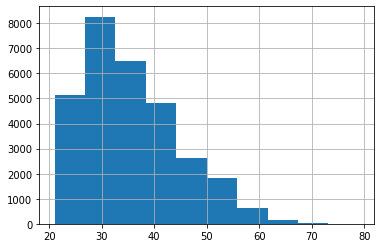

In [19]:
# Analysing based on Age(in year)
df['AGE'].hist()

Credit Card holders whose age is between 28 to 40 are highest in numbers 

Text(0.5, 1.0, 'Sex vs count')

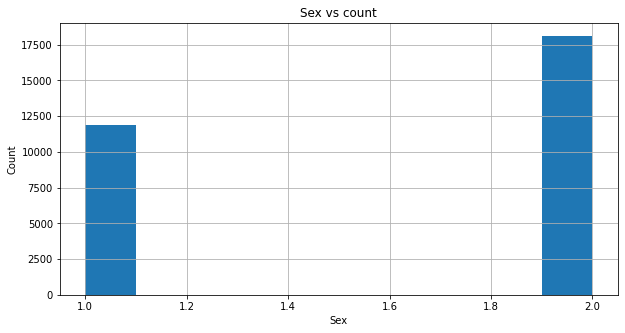

In [20]:
# Analysis based on Gender (1 = male; 2 = female)
plt.figure(figsize=(10,5))
df['SEX'].hist()
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex vs count')

Females contains more numbers of credit cards as compare to males

Text(0.5, 1.0, 'Default Clients :Default = 1, Not Default = 0')

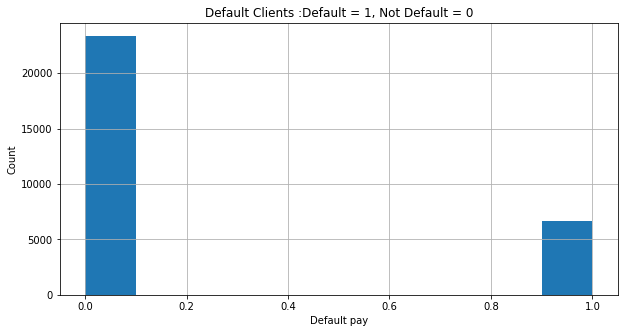

In [21]:
# Numbers of Default and Not Default credit card holders
plt.figure(figsize=(10,5))
df['default_payment_next_month'].hist()
plt.xlabel('Default pay')
plt.ylabel('Count')
plt.title('Default Clients :Default = 1, Not Default = 0')

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

Text(0.5, 1.0, 'Edu v/s Count')

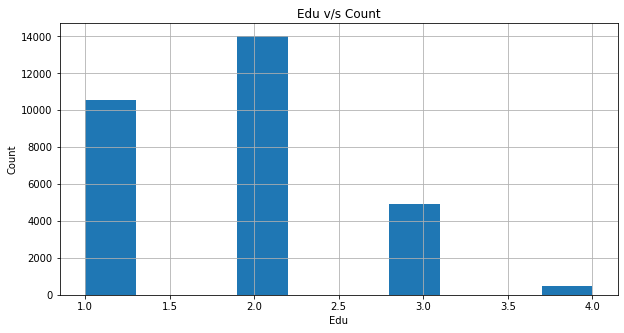

In [22]:
# Analysing on Education Basis (1 = graduate school; 2 = university; 3 = high school; 4 = others)
plt.figure(figsize=(10,5))
df['EDUCATION'].hist()
plt.xlabel('Edu')
plt.ylabel('Count')
plt.title('Edu v/s Count')

University has highest numbers of credit card holders followed by Graduate School.

Text(0.5, 1.0, 'Marriage v/s Count')

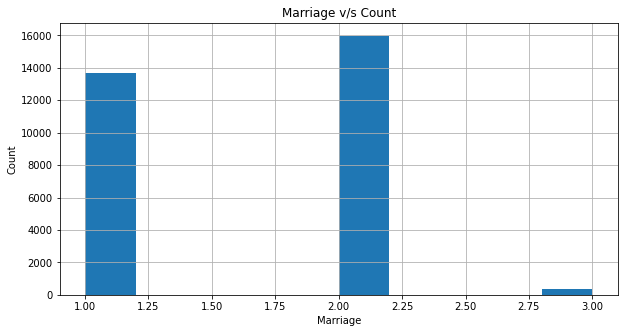

In [23]:
# Analysing on Marriage Basis (1 = married; 2 = single; 3 = others)
plt.figure(figsize=(10,5))
df['MARRIAGE'].hist()
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.title('Marriage v/s Count')

More number of credit cards holder are Singles followed by Married ones.

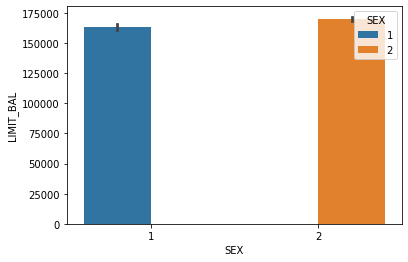

In [24]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=df,hue='SEX')

Credit Limit of Male members are less as compare to females.

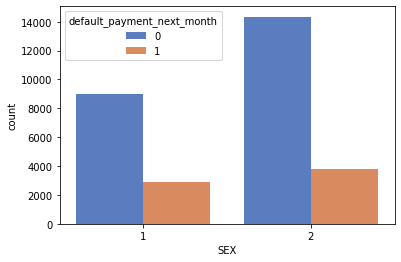

In [25]:
sns.countplot(x='SEX', data=df,hue="default_payment_next_month", palette="muted") 

In Males, Non Default credit card holders has highest numbers present.
In Females, Non Default credit card holders has highest numbers present.

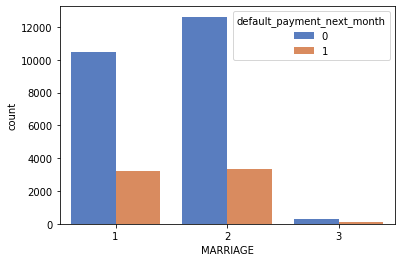

In [26]:
g=sns.countplot(x="MARRIAGE", data=df,hue="default_payment_next_month", palette="muted")

From plot it is clear that people who have marital as status single have more default payment wrt married status people

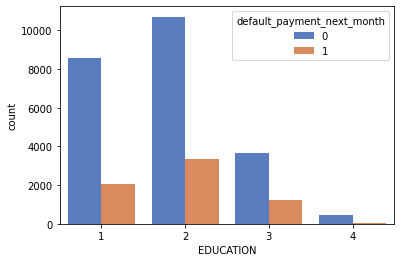

In [27]:
g=sns.countplot(x="EDUCATION", data=df,hue="default_payment_next_month", palette="muted")

#Heat Map

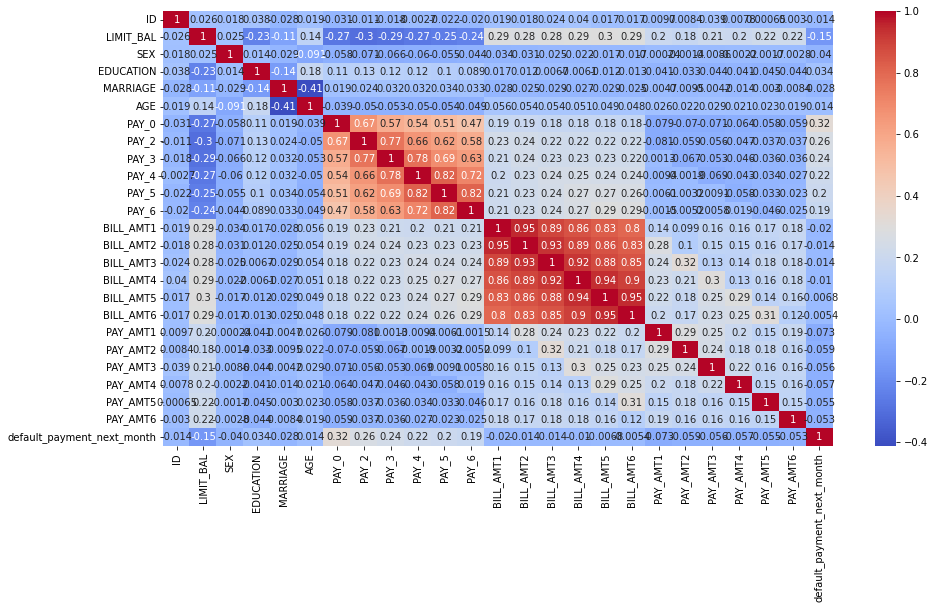

In [28]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [29]:
# Remove ID Columns from the datasets
df.drop('ID', axis=1, inplace=True)

removing the ID columes from the datasets as it is unwanted column.

## Standard Normalization

In [30]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X = df.iloc[:,0:-1]
X = scaling.fit_transform(X)

In [31]:
X

array([[-1.13672015,  0.81016074,  0.21186989, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.21186989, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.21186989, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.21186989, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.55508562, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.21186989, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [32]:
y = df.iloc[:,-1]

In [33]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64

# Splitting the data in train test split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(21000, 23)
(9000, 23)


In our datasets there are 3000 observations and 23 columes.

In [35]:
print(y_train.value_counts())

0    16304
1     4696
Name: default_payment_next_month, dtype: int64


16304 observations are there in our training datasets which are not default and 4696 observations are there which are default credit card holders.

In [36]:
y_test.value_counts()

0    7060
1    1940
Name: default_payment_next_month, dtype: int64

7060 observations are there in our testing datasets which are not default and 1940 observations are there which are default credit card holders.

#Algorithms for machine learning

## Logistic Regression

In [37]:
# Importing the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [38]:
# predicting the y test observations
y_pred = logmodel.predict(X_test)

In [39]:
y_train_pred = logmodel.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.807429,0.70529,0.238501,0.356461,0.604898


In [40]:
# Calculating the Evaluation Matrics for this algorithm
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.816556,0.738056,0.230928,0.351786,0.604203


In [41]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7060
           1       0.74      0.23      0.35      1940

    accuracy                           0.82      9000
   macro avg       0.78      0.60      0.62      9000
weighted avg       0.80      0.82      0.78      9000

[[6901  159]
 [1492  448]]


Hyperparameter Tunning for Logistic Regression

In [42]:

logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search_log = grid_search_log.fit(X_train,y_train)
best_accuracy = grid_search_log.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

best_parameters = grid_search_log.best_params_
best_parameters

y_pred_log = grid_search_log.predict(X_test)
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

Accuracy on Cross Validation set : 0.8077142857142856


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.816556,0.738056,0.230928,0.351786,0.604203


## Using KNN classifier algorithm

In [43]:
# Importing the KNN Model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train , y_train)

KNeighborsClassifier()

In [44]:
# predicting the y test observations
y_pred = classifier.predict(X_test)

In [45]:
y_train_pred = classifier.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['KNN Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN Classifier,0.843238,0.727184,0.478492,0.57719,0.713394


In [46]:
# findng all metrics values after using KNN Classifier
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['KNN Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN Classifier,0.789444,0.5179,0.335567,0.407257,0.624866


In [47]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      7060
           1       0.52      0.34      0.41      1940

    accuracy                           0.79      9000
   macro avg       0.68      0.62      0.64      9000
weighted avg       0.77      0.79      0.77      9000

[[6454  606]
 [1289  651]]


##XGBOOST Classifier

In [48]:
# Importing the XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier()

In [49]:
y_train_pred = xgb.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.823714,0.696443,0.375213,0.487683,0.664054


In [50]:
# findng all metrics values after using XGBoost classfier
y_pred =xgb.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.824778,0.676043,0.359278,0.469202,0.655985


In [51]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      7060
           1       0.68      0.36      0.47      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000

[[6726  334]
 [1243  697]]


##Naive Bayes

In [52]:
# Importing the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [53]:
y_pred =naive_bayes.predict(X_test)


In [54]:
y_train_pred = naive_bayes.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.588571,0.321506,0.756388,0.45122,0.648312


In [55]:
# findng all metrics values after using Naive Bayes Model
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.584778,0.309276,0.751031,0.43813,0.645062


In [56]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.54      0.67      7060
           1       0.31      0.75      0.44      1940

    accuracy                           0.58      9000
   macro avg       0.60      0.65      0.55      9000
weighted avg       0.76      0.58      0.62      9000

[[3806 3254]
 [ 483 1457]]


##SVM ALgorithm

In [57]:
# import svm model
from sklearn import svm
clf = svm.SVC(kernel='linear') # linear kernel

# train the model using training set
clf.fit(X_train, y_train)

# predict the response for test datasets 
y_pred = clf.predict(X_test)

In [58]:
y_train_pred = clf.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM,0.806524,0.703799,0.232751,0.349816,0.602269


In [59]:
# findng all metrics values after using SVM
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['SVM', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM,0.815,0.718601,0.23299,0.351888,0.603959


In [60]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7060
           1       0.72      0.23      0.35      1940

    accuracy                           0.81      9000
   macro avg       0.77      0.60      0.62      9000
weighted avg       0.80      0.81      0.78      9000

[[6883  177]
 [1488  452]]


##Decision Tree

In [61]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [62]:
y_pred = model.predict(X_test)

In [63]:
y_train_pred = model.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)
prec = precision_score(y_train, y_train_pred)
rec = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,0.999714,0.999787,0.998935,0.999361,0.999437


In [64]:
# findng all metrics values after using Decision Tree Classifier
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,0.735667,0.394013,0.420619,0.406881,0.621428


In [65]:
# Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7060
           1       0.39      0.42      0.41      1940

    accuracy                           0.74      9000
   macro avg       0.62      0.62      0.62      9000
weighted avg       0.74      0.74      0.74      9000

[[5805 1255]
 [1124  816]]


Decision Tree using Hypertuning

In [70]:
params = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [1,2,3,4,5,6,7,None],
    "splitter":['best','random'],
    "class_weight" : ['balanced',None],
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10],
    'min_samples_split':[2,4,6,8,10]
}

In [67]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,param_grid=params, cv=10, n_jobs=-1)

In [79]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [81]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [82]:
grid.best_score_

0.8181904761904762

In [83]:

best_accuracy_1 = grid.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)
best_parameters_2 = grid.best_params_
best_parameters_2
y_pred_dct = grid.predict(X_test)
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

Accuracy on Cross Validation set : 0.8181904761904762


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.816556,0.738056,0.230928,0.351786,0.604203
1,Decision Tree Tuned,0.825889,0.686687,0.353608,0.466825,0.654637
